# Data Mining 
## 1. Apostolopoulou Alexandra (1115201700005)
## 2. Briakos Spyros (1115201700101)
## Project 2
### Questions 1,2,3

In [3]:
import pandas as pd
import string
import os
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import time

## Merging data and creation of csv files (train.csv and test.csv)

In [4]:
t1 = time.time()

business = os.listdir('/home/spympr/Desktop/Εργασίες/Data_Mining_2/fulltext/data/business/')
entertainment = os.listdir('/home/spympr/Desktop/Εργασίες/Data_Mining_2/fulltext/data/entertainment/')
politics = os.listdir('/home/spympr/Desktop/Εργασίες/Data_Mining_2/fulltext/data/politics/')
sport = os.listdir('/home/spympr/Desktop/Εργασίες/Data_Mining_2/fulltext/data/sport/')
tech = os.listdir('/home/spympr/Desktop/Εργασίες/Data_Mining_2/fulltext/data/tech/')

data = [] 
id = 0

for temp in business:
    f = open('/home/spympr/Desktop/Εργασίες/Data_Mining_2/fulltext/data/business/'+temp, "r")
    lines = f.readlines()
    content = []
    for temp in lines[1:]:
        content = content + temp.splitlines()
    content = ''.join([str(elem) for elem in content]) 
    data.append([id,''.join(lines[0].splitlines()),content,'business'])
    f.close()
    id = id + 1
    
for temp in entertainment:
    f = open('/home/spympr/Desktop/Εργασίες/Data_Mining_2/fulltext/data/entertainment/'+temp, "r")
    lines = f.readlines()
    content = []
    for temp in lines[1:]:
        content = content + temp.splitlines()
    content = ''.join([str(elem) for elem in content]) 
    data.append([id,''.join(lines[0].splitlines()),content,'entertainment'])
    f.close()
    id = id + 1

for temp in politics:
    f = open('/home/spympr/Desktop/Εργασίες/Data_Mining_2/fulltext/data/politics/'+temp, "r")
    lines = f.readlines()
    content = []
    for temp in lines[1:]:
        content = content + temp.splitlines()
    content = ''.join([str(elem) for elem in content]) 
    data.append([id,''.join(lines[0].splitlines()),content,'politics'])
    f.close()
    id = id + 1
    
for temp in sport:
    f = open('/home/spympr/Desktop/Εργασίες/Data_Mining_2/fulltext/data/sport/'+temp, "r",errors='ignore')
    lines = f.readlines()
    content = []
    for temp in lines[1:]:
        content = content + temp.splitlines()
    content = ''.join([str(elem) for elem in content]) 
    data.append([id,''.join(lines[0].splitlines()),content,'sport'])
    f.close()
    id = id + 1

    
for temp in tech:
    f = open('/home/spympr/Desktop/Εργασίες/Data_Mining_2/fulltext/data/tech/'+temp, "r")
    lines = f.readlines()
    content = []
    for temp in lines[1:]:
        content = content + temp.splitlines()
    content = ''.join([str(elem) for elem in content]) 
    data.append([id,''.join(lines[0].splitlines()),content,'tech'])
    f.close()
    id = id + 1
    
df = pd.DataFrame(data, columns = ['id', 'title','content','category']) 
#Split the dataframe into training and testing set.
train,test = train_test_split(df,test_size=0.2,random_state=42,stratify=df['category'])

#Save then into two files
train.to_csv('train_set.tsv', sep = '\t')
test.to_csv('test_set.tsv', sep = '\t')

#Create Labels
msg_train = train['content'].tolist()
msg_test = test['content'].tolist()
label_train = train['category'].tolist()
label_test = test['category'].tolist()

In [5]:
#Labelize Y_train,Y_test...
from sklearn import preprocessing
   
le = preprocessing.LabelEncoder()
le.fit(label_train)
label_train = le.transform(label_train)
label_test = le.transform(label_test)

##  1. Creation of WordClouds

### WordCloud for category 'business'

In [6]:
new_df = df[['content', 'category']].copy()

temp = new_df[(new_df['category'] == 'entertainment') | (new_df['category'] == 'politics')  | (new_df['category'] == 'sport')  | (new_df['category'] == 'tech')].index
new_df.drop(temp , inplace=True)
new_df

,content,category
0,Israel's economy is forecast to grow by 4.2% i...,business
1,British Airways has blamed high fuel prices fo...,business
2,News Corporation is seeking to buy out minorit...,business
3,The merger of Russian gas giant Gazprom and oi...,business
4,The French government is to hand its strugglin...,business
...,...,...
505,Rising fuel and materials costs are hitting co...,business
506,A row over the colour orange could hit the cou...,business
507,Two big US names have launched advertising cam...,business
508,The Bank of England has left interest rates on...,business


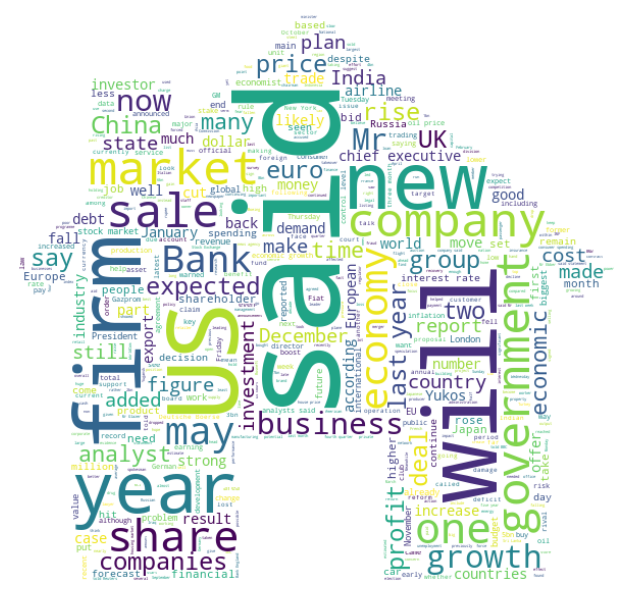

In [7]:
text = " ".join(str(n) for n in new_df['content'])
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

def generate_wordcloud(text, mask):
    word_cloud = WordCloud(width = 512, height = 512, max_words=500, stopwords=STOPWORDS, background_color='white', mask=mask).generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
generate_wordcloud(text, mask)

### WordCloud for category 'entertainment'

In [8]:
new_df = df[['content', 'category']].copy()

temp = new_df[(new_df['category'] == 'business') | (new_df['category'] == 'politics')  | (new_df['category'] == 'sport')  | (new_df['category'] == 'tech')].index
new_df.drop(temp , inplace=True)
new_df

,content,category
510,Movie stars from across the globe are attendin...,entertainment
511,The 10 authors shortlisted for a Richard and J...,entertainment
512,Franz Ferdinand frontman Alex Kapranos has cal...,entertainment
513,A German movie about an anti-Nazi resistance h...,entertainment
514,Rock 'n' roll legend Elvis is set to top the U...,entertainment
...,...,...
891,The 77th annual Academy Awards are taking plac...,entertainment
892,Some of Elvis Presley's earliest recordings - ...,entertainment
893,"MTV has been criticised for ""incessant sleaze""...",entertainment
894,The British producers of US Wife Swap are taki...,entertainment


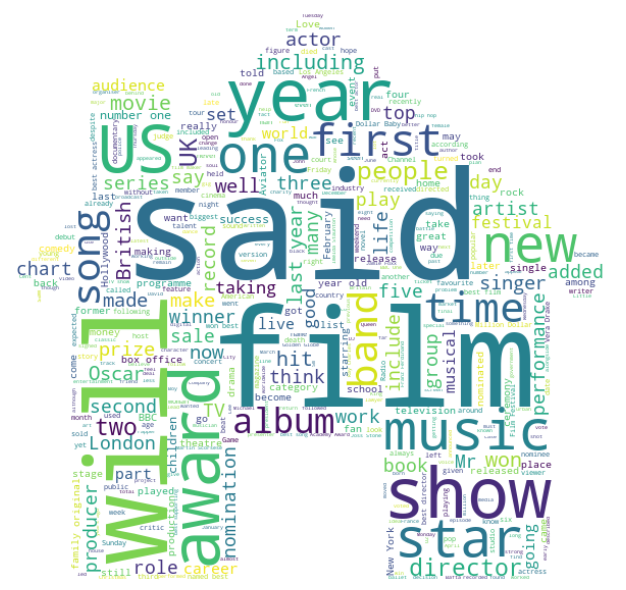

In [9]:
text = " ".join(str(n) for n in new_df['content'])
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

def generate_wordcloud(text, mask):
    word_cloud = WordCloud(width = 512, height = 512, max_words=500, stopwords=STOPWORDS, background_color='white', mask=mask).generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
generate_wordcloud(text, mask)

### WordCloud for category 'politics'

In [10]:
new_df = df[['content', 'category']].copy()

temp = new_df[(new_df['category'] == 'business') | (new_df['category'] == 'entertainment')  | (new_df['category'] == 'sport')  | (new_df['category'] == 'tech')].index
new_df.drop(temp , inplace=True)
new_df

,content,category
896,Public trust in the handling of the economy ca...,politics
897,The Labour Party will hold its 2006 autumn con...,politics
898,Peace protestors have lost a landmark appeal o...,politics
899,Climate change could be completely out of cont...,politics
900,A majority of voters (68%) believe the prime m...,politics
...,...,...
1308,Tony Blair says he will be facing the issue of...,politics
1309,Neil Kinnock has said his acceptance of a seat...,politics
1310,Murder sentences should not be reduced automat...,politics
1311,Archbishop Desmond Tutu has called for the rel...,politics


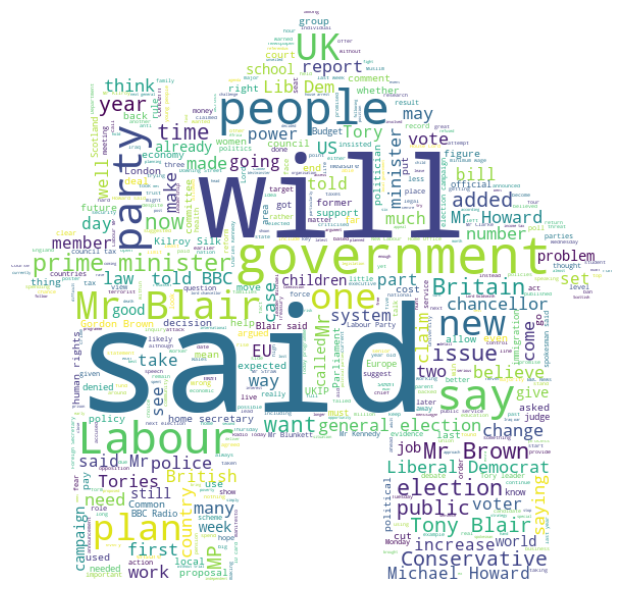

In [11]:
text = " ".join(str(n) for n in new_df['content'])
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

def generate_wordcloud(text, mask):
    word_cloud = WordCloud(width = 512, height = 512, max_words=500, stopwords=STOPWORDS, background_color='white', mask=mask).generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
generate_wordcloud(text, mask)

### WordCloud for category 'sports'

In [12]:
new_df = df[['content', 'category']].copy()

temp = new_df[(new_df['category'] == 'business') | (new_df['category'] == 'entertainment')  | (new_df['category'] == 'politics')  | (new_df['category'] == 'tech')].index
new_df.drop(temp , inplace=True)
new_df

,content,category
1313,Wales are hopeful that openside flanker Martyn...,sport
1314,The IAAF - athletics' world governing body - h...,sport
1315,Marat Safin suffered a shock loss to unseeded ...,sport
1316,Newry City are expected to discuss legal avenu...,sport
1317,Jason Gardener says being made an MBE in the N...,sport
...,...,...
1819,Adriano's agent Gilmar Rinaldi has insisted th...,sport
1820,Premiership side Newcastle United face a trip ...,sport
1821,Tim Henman's decision to quit Davis Cup tennis...,sport
1822,World number one Lindsay Davenport has critici...,sport


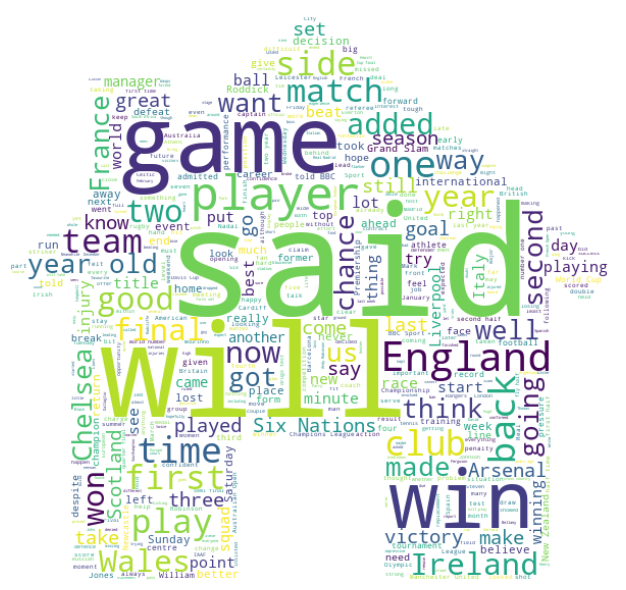

In [13]:
text = " ".join(str(n) for n in new_df['content'])
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

def generate_wordcloud(text, mask):
    word_cloud = WordCloud(width = 512, height = 512, max_words=500, stopwords=STOPWORDS, background_color='white', mask=mask).generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
generate_wordcloud(text, mask)

### WordCloud for category 'tech'

In [14]:
new_df = df[['content', 'category']].copy()

temp = new_df[(new_df['category'] == 'business') | (new_df['category'] == 'entertainment')  | (new_df['category'] == 'politics')  | (new_df['category'] == 'sport')].index
new_df.drop(temp , inplace=True)
new_df

,content,category
1824,Apple has won its legal fight to make three bl...,tech
1825,"Nicholas Negroponte, chairman and founder of M...",tech
1826,"The luxury cruise liner Crystal Harmony, curre...",tech
1827,Spin the radio dial in the US and you are like...,tech
1828,Sony's PlayStation Portable (PSP) will go on s...,tech
...,...,...
2220,"Spam traffic is up by 40%, putting the total a...",tech
2221,Thousands of technology lovers and industry ex...,tech
2222,The web looks very different today than it did...,tech
2223,Broadband's rapid rise continues apace as spee...,tech


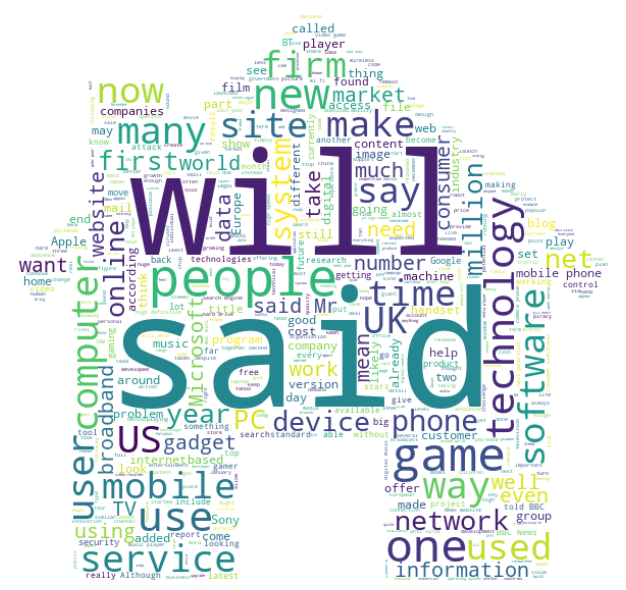

In [15]:
text = " ".join(str(n) for n in new_df['content'])
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

def generate_wordcloud(text, mask):
    word_cloud = WordCloud(width = 512, height = 512, max_words=500, stopwords=STOPWORDS, background_color='white', mask=mask).generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
generate_wordcloud(text, mask)

## 2. Classification's Implementation 

##    <span style='color:Blue'>*Step 1:* </span> Vectorization

### a. Bag-Οf-Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
bowX_train = count_vectorizer.fit_transform(msg_train) #For training set
bowX_test = count_vectorizer.transform(msg_test)  #For testing set

### b. TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidfX_train = tfidf_vectorizer.fit_transform(msg_train)  #For the training set 
tfidfX_test = tfidf_vectorizer.transform(msg_test)  #For the testing set

## <span style='color:Blue'>*Step 2:* </span> Trying various classification's methods and evaluate them 

### a. SVM

Eδώ πειραματιστήκαμε με τις παραμέτρους kernel (rbf,linear), c και gamma, η επιλογή εκ των οποίων έγινε με την συνάρτηση GridSearchCV.

#### For method Bag-of-words:

Precision score of Bag-of-words with SVM Classifier:  0.94
Recall score of Bag-of-words with SVM Classifier:  0.94
F1 score of Bag-of-words with SVM Classifier:  0.94
Accuracy score of Bag-of-words with SVM Classifier:  0.94


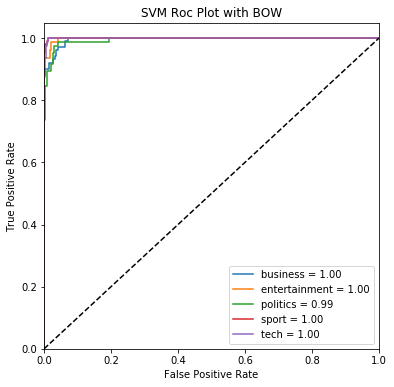

In [18]:
from sklearn import svm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,make_scorer
    
#Precision    
scorer = make_scorer(precision_score,average='weighted')
gs_svc = GridSearchCV(estimator=svm.SVC(probability=True),param_grid={'C': [1,10,100],'gamma': [1e-3, 1e-4], 'kernel': ('linear', 'rbf')},scoring=scorer,cv=10,n_jobs=-1)
gs_svc.fit(bowX_train,label_train)
cv_results = gs_svc.cv_results_
svm_bow_pre_train_score = np.mean(cv_results['mean_test_score'])
svm_bow_pre_test_score = gs_svc.score(bowX_test, label_test)  
print('Precision score of Bag-of-words with SVM Classifier: ' , "{:.2f}".format(svm_bow_pre_test_score))

#Recall
scorer = make_scorer(recall_score,average='weighted')
gs_svc = GridSearchCV(estimator=svm.SVC(probability=True),param_grid={'C': [1,10,100],'gamma': [1e-3, 1e-4], 'kernel': ('linear', 'rbf')},scoring=scorer,cv=10,n_jobs=-1)
gs_svc.fit(bowX_train,label_train)
cv_results = gs_svc.cv_results_
svm_bow_rec_train_score = np.mean(cv_results['mean_test_score'])
svm_bow_rec_test_score = gs_svc.score(bowX_test, label_test)  
print('Recall score of Bag-of-words with SVM Classifier: ' , "{:.2f}".format(svm_bow_rec_test_score))

#F1
scorer = make_scorer(f1_score,average='weighted')
gs_svc = GridSearchCV(estimator=svm.SVC(probability=True),param_grid={'C': [1,10,100],'gamma': [1e-3, 1e-4], 'kernel': ('linear', 'rbf')},scoring=scorer,cv=10,n_jobs=-1)
gs_svc.fit(bowX_train,label_train)
cv_results = gs_svc.cv_results_
svm_bow_f1_train_score = np.mean(cv_results['mean_test_score'])
svm_bow_f1_test_score = gs_svc.score(bowX_test, label_test)  
print('F1 score of Bag-of-words with SVM Classifier: ' , "{:.2f}".format(svm_bow_f1_test_score))

#Accuracy
scorer = make_scorer(accuracy_score)
gs_svc = GridSearchCV(estimator=svm.SVC(probability=True),param_grid={'C': [1,10,100],'gamma': [1e-3, 1e-4], 'kernel': ('linear', 'rbf')},scoring=scorer,cv=10,n_jobs=-1)
gs_svc.fit(bowX_train,label_train)
cv_results = gs_svc.cv_results_
svm_bow_acc_train_score = np.mean(cv_results['mean_test_score'])
svm_bow_acc_test_score = gs_svc.score(bowX_test, label_test)  
print('Accuracy score of Bag-of-words with SVM Classifier: ' , "{:.2f}".format(svm_bow_acc_test_score))

#Roc-Plot
n_classes = 5
y_score = gs_svc.predict_proba(bowX_test)
bin_label_test = label_binarize(label_test, classes=[0,1,2,3,4])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresolds = roc_curve(bin_label_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 

plt.figure(figsize=(6,6))
labels = ['business','entertainment','politics','sport','tech']
for i in range(n_classes):
    category = labels[i]
    plt.plot(fpr[i], tpr[i], label='{0} = {1:0.2f}'
                                   ''.format(category, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Roc Plot with BOW')
plt.legend(loc="lower right")
plt.show()

#### For method TF-IDF:

Precision score of Tfidf with SVM Classifier:  0.97
Recall score of Tfidf with SVM Classifier:  0.97
F1 score of Tfidf with SVM Classifier:  0.97
Accuracy score of Tfidf with SVM Classifier:  0.97


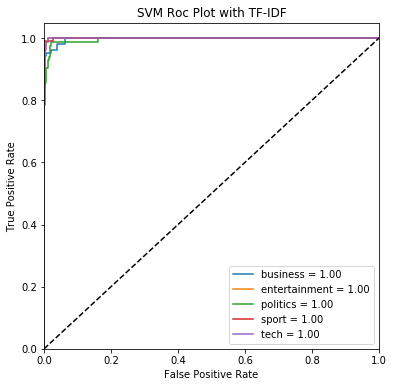

In [19]:
from sklearn import svm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,make_scorer
    
#Precision    
scorer = make_scorer(precision_score,average='weighted')
gs_svc = GridSearchCV(estimator=svm.SVC(probability=True),param_grid={'C': [1,10,100],'gamma': [1e-3, 1e-4], 'kernel': ('linear', 'rbf')},scoring=scorer,cv=10,n_jobs=-1)
gs_svc.fit(tfidfX_train,label_train)
cv_results = gs_svc.cv_results_
svm_tfidf_pre_train_score = np.mean(cv_results['mean_test_score'])
svm_tfidf_pre_test_score = gs_svc.score(tfidfX_test, label_test)  
print('Precision score of Tfidf with SVM Classifier: ' , "{:.2f}".format(svm_tfidf_pre_test_score))

#Recall
scorer = make_scorer(recall_score,average='weighted')
gs_svc = GridSearchCV(estimator=svm.SVC(probability=True),param_grid={'C': [1,10,100],'gamma': [1e-3, 1e-4], 'kernel': ('linear', 'rbf')},scoring=scorer,cv=10,n_jobs=-1)
gs_svc.fit(tfidfX_train,label_train)
cv_results = gs_svc.cv_results_
svm_tfidf_rec_train_score = np.mean(cv_results['mean_test_score'])
svm_tfidf_rec_test_score = gs_svc.score(tfidfX_test, label_test)  
print('Recall score of Tfidf with SVM Classifier: ' , "{:.2f}".format(svm_tfidf_rec_test_score))

#F1
scorer = make_scorer(f1_score,average='weighted')
gs_svc = GridSearchCV(estimator=svm.SVC(probability=True),param_grid={'C': [1,10,100],'gamma': [1e-3, 1e-4], 'kernel': ('linear', 'rbf')},scoring=scorer,cv=10,n_jobs=-1)
gs_svc.fit(tfidfX_train,label_train)
cv_results = gs_svc.cv_results_
svm_tfidf_f1_train_score = np.mean(cv_results['mean_test_score'])
svm_tfidf_f1_test_score= gs_svc.score(tfidfX_test, label_test)  
print('F1 score of Tfidf with SVM Classifier: ' , "{:.2f}".format(svm_tfidf_f1_test_score))

#Accuracy
scorer = make_scorer(accuracy_score)
gs_svc = GridSearchCV(estimator=svm.SVC(probability=True),param_grid={'C': [1,10,100],'gamma': [1e-3, 1e-4], 'kernel': ('linear', 'rbf')},scoring=scorer,cv=10,n_jobs=-1)
gs_svc.fit(tfidfX_train,label_train)
cv_results = gs_svc.cv_results_
svm_tfidf_acc_train_score = np.mean(cv_results['mean_test_score'])
svm_tfidf_acc_test_score = gs_svc.score(tfidfX_test, label_test)  
print('Accuracy score of Tfidf with SVM Classifier: ' , "{:.2f}".format(svm_tfidf_acc_test_score))

#Roc-Plot
n_classes = 5
y_score = gs_svc.predict_proba(tfidfX_test)
bin_label_test = label_binarize(label_test, classes=[0,1,2,3,4])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresolds = roc_curve(bin_label_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 

plt.figure(figsize=(6,6))
labels = ['business','entertainment','politics','sport','tech']
for i in range(n_classes):
    category = labels[i]
    plt.plot(fpr[i], tpr[i], label='{0} = {1:0.2f}'
                                   ''.format(category, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Roc Plot with TF-IDF')
plt.legend(loc="lower right")
plt.show()

### b. Naive-Bayes

#### For method Bag-of-words:

Precision score of Bag-of-words with Naive-Bayes Classifier:  0.94
Recall score of Bag-of-words with Naive-Bayes Classifier:  0.94
F1 score of Bag-of-words with Naive-Bayes Classifier:  0.94
Accuracy score of Bag-of-words with Naive-Bayes Classifier:  0.94


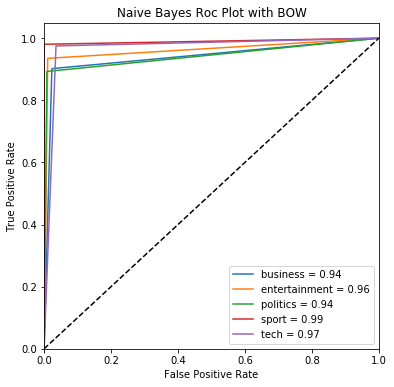

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

gnb1 = GaussianNB()
gnb1.fit(bowX_train.toarray(), label_train)

#Precision
scores = cross_val_score(gnb1, bowX_train.toarray(), label_train,scoring='precision_weighted', cv=10)
nb_bow_pre_train_score = "{:.2f}".format(np.mean(scores))
predictions = gnb1.predict(bowX_test.toarray())
nb_bow_pre_test_score = "{:.2f}".format(precision_score(label_test,predictions,average='weighted'))
print('Precision score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_pre_test_score)

#Recall
scores = cross_val_score(gnb1, bowX_train.toarray(), label_train,scoring='recall_weighted', cv=10)
nb_bow_rec_train_score = "{:.2f}".format(np.mean(scores))
predictions = gnb1.predict(bowX_test.toarray())
nb_bow_rec_test_score = "{:.2f}".format(recall_score(label_test,predictions,average='weighted'))
print('Recall score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_rec_test_score)

#F1 
scores = cross_val_score(gnb1, bowX_train.toarray(), label_train,scoring='f1_weighted', cv=10)
nb_bow_f1_train_score = "{:.2f}".format(np.mean(scores))
predictions = gnb1.predict(bowX_test.toarray())
nb_bow_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_f1_test_score)

#Accuracy
scores = cross_val_score(gnb1, bowX_train.toarray(), label_train,scoring='accuracy', cv=10)
nb_bow_acc_train_score = "{:.2f}".format(np.mean(scores))
predictions = gnb1.predict(bowX_test.toarray())
nb_bow_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_acc_test_score)

#Roc-Plot
n_classes = 5
y_score = gnb1.predict_proba(bowX_test.toarray())
bin_label_test = label_binarize(label_test, classes=[0,1,2,3,4])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresolds = roc_curve(bin_label_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 

plt.figure(figsize=(6,6))
labels = ['business','entertainment','politics','sport','tech']
for i in range(n_classes):
    category = labels[i]
    plt.plot(fpr[i], tpr[i], label='{0} = {1:0.2f}'
                                   ''.format(category, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Roc Plot with BOW')
plt.legend(loc="lower right")
plt.show()

#### For method TF-IDF:

Precision score of Tfidf with Naive-Bayes Classifier:  0.94
Recall score of Tfidf with Naive-Bayes Classifier:  0.93
F1 score of Tfidf with Naive-Bayes Classifier:  0.93
Accuracy score of Tfidf with Naive-Bayes Classifier:  0.93


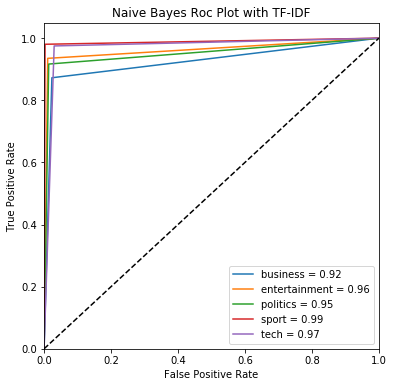

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

gnb2 = GaussianNB()
gnb2.fit(tfidfX_train.toarray(), label_train)

#Precision
scores = cross_val_score(gnb2, tfidfX_train.toarray(), label_train,scoring='precision_weighted', cv=10)
nb_tfidf_pre_train_score = "{:.2f}".format(np.mean(scores))
predictions = gnb2.predict(tfidfX_test.toarray())
nb_tfidf_pre_test_score = "{:.2f}".format(precision_score(label_test,predictions,average='weighted'))
print('Precision score of Tfidf with Naive-Bayes Classifier: ' , nb_tfidf_pre_test_score)

#Recall
scores = cross_val_score(gnb2, tfidfX_train.toarray(), label_train,scoring='recall_weighted', cv=10)
nb_tfidf_rec_train_score = "{:.2f}".format(np.mean(scores))
predictions = gnb2.predict(tfidfX_test.toarray())
nb_tfidf_rec_test_score = "{:.2f}".format(recall_score(label_test,predictions,average='weighted'))
print('Recall score of Tfidf with Naive-Bayes Classifier: ' , nb_tfidf_rec_test_score)

#F1
scores = cross_val_score(gnb2, tfidfX_train.toarray(), label_train,scoring='f1_weighted', cv=10)
nb_tfidf_f1_train_score = "{:.2f}".format(np.mean(scores))
predictions = gnb2.predict(tfidfX_test.toarray())
nb_tfidf_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Tfidf with Naive-Bayes Classifier: ' , nb_tfidf_f1_test_score)

#Accuracy
scores = cross_val_score(gnb2, tfidfX_train.toarray(), label_train,scoring='accuracy', cv=10)
nb_tfidf_acc_train_score = "{:.2f}".format(np.mean(scores))
predictions = gnb2.predict(tfidfX_test.toarray())
nb_tfidf_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Tfidf with Naive-Bayes Classifier: ' , nb_tfidf_acc_test_score)

#Roc-Plot
n_classes = 5
y_score = gnb2.predict_proba(tfidfX_test.toarray())
bin_label_test = label_binarize(label_test, classes=[0,1,2,3,4])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresolds = roc_curve(bin_label_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 

plt.figure(figsize=(6,6))
labels = ['business','entertainment','politics','sport','tech']
for i in range(n_classes):
    category = labels[i]
    plt.plot(fpr[i], tpr[i], label='{0} = {1:0.2f}'
                                   ''.format(category, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Roc Plot with TF-IDF')
plt.legend(loc="lower right")
plt.show()

### c. Random Forest

#### For method Bag-of-words:

Precision score of Bag-of-words with Random-Forests Classifier:  0.95
Recall score of Bag-of-words with Random-Forests Classifier:  0.95
F1 score of Bag-of-words with Random-Forests Classifier:  0.95
Accuracy score of Bag-of-words with Random-Forests Classifier:  0.95


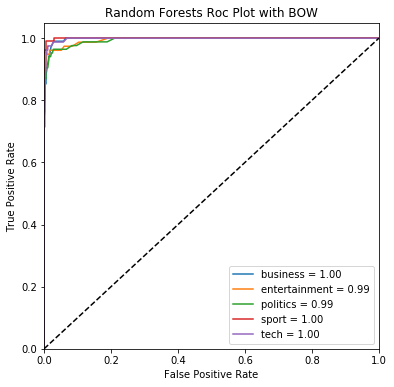

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(bowX_train, label_train)

#Precision 
scores = cross_val_score(rf1, bowX_train, label_train,scoring='precision_weighted', cv=10)
rf_bow_pre_train_score = "{:.2f}".format(np.mean(scores))
predictions = rf1.predict(bowX_test)
rf_bow_pre_test_score = "{:.2f}".format(precision_score(label_test,predictions,average='weighted'))
print('Precision score of Bag-of-words with Random-Forests Classifier: ' , rf_bow_pre_test_score)

#Recall
scores = cross_val_score(rf1, bowX_train, label_train,scoring='recall_weighted', cv=10)
rf_bow_rec_train_score = "{:.2f}".format(np.mean(scores))
predictions = rf1.predict(bowX_test)
rf_bow_rec_test_score = "{:.2f}".format(recall_score(label_test,predictions,average='weighted'))
print('Recall score of Bag-of-words with Random-Forests Classifier: ' , rf_bow_rec_test_score)

#F1
scores = cross_val_score(rf1, bowX_train, label_train,scoring='f1_weighted', cv=10)
rf_bow_f1_train_score = "{:.2f}".format(np.mean(scores))
predictions = rf1.predict(bowX_test)
rf_bow_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with Random-Forests Classifier: ' , rf_bow_f1_test_score)

#Accuracy
scores = cross_val_score(rf1, bowX_train, label_train,scoring='accuracy', cv=10)
rf_bow_acc_train_score = "{:.2f}".format(np.mean(scores))
predictions = rf1.predict(bowX_test)
rf_bow_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with Random-Forests Classifier: ' , rf_bow_acc_test_score)

#Roc-Plot
n_classes = 5
y_score = rf1.predict_proba(bowX_test)
bin_label_test = label_binarize(label_test, classes=[0,1,2,3,4])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresolds = roc_curve(bin_label_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 

plt.figure(figsize=(6,6))
labels = ['business','entertainment','politics','sport','tech']
for i in range(n_classes):
    category = labels[i]
    plt.plot(fpr[i], tpr[i], label='{0} = {1:0.2f}'
                                   ''.format(category, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forests Roc Plot with BOW')
plt.legend(loc="lower right")
plt.show()

#### For method TF-IDF:

Precision score of Tfidf with Random-Forests Classifier:  0.95
Recall score of Tfidf with Random-Forests Classifier:  0.95
F1 score of Tfidf with Random-Forests Classifier:  0.95
Accuracy score of Tfidf with Random-Forests Classifier:  0.95


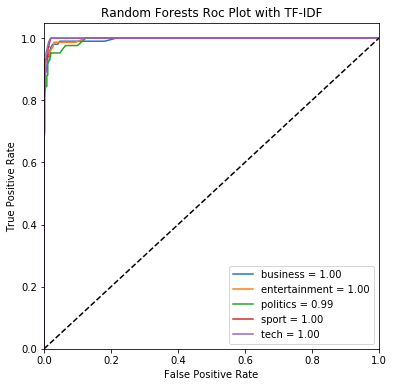

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
rf2 = RandomForestClassifier(n_estimators=100)
rf2.fit(tfidfX_train, label_train)

#Precision
scores = cross_val_score(rf2, tfidfX_train, label_train,scoring='precision_weighted', cv=10)
rf_tfidf_pre_train_score = "{:.2f}".format(np.mean(scores))
predictions = rf2.predict(tfidfX_test)
rf_tfidf_pre_test_score = "{:.2f}".format(precision_score(label_test,predictions,average='weighted'))
print('Precision score of Tfidf with Random-Forests Classifier: ' , rf_tfidf_pre_test_score)

#Recall
scores = cross_val_score(rf2, tfidfX_train, label_train,scoring='recall_weighted', cv=10)
rf_tfidf_rec_train_score = "{:.2f}".format(np.mean(scores))
predictions = rf2.predict(tfidfX_test)
rf_tfidf_rec_test_score = "{:.2f}".format(recall_score(label_test,predictions,average='weighted'))
print('Recall score of Tfidf with Random-Forests Classifier: ' , rf_tfidf_rec_test_score)

#F1
scores = cross_val_score(rf2, tfidfX_train, label_train,scoring='f1_weighted', cv=10)
rf_tfidf_f1_train_score = "{:.2f}".format(np.mean(scores))
predictions = rf2.predict(tfidfX_test)
rf_tfidf_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Tfidf with Random-Forests Classifier: ' , rf_tfidf_f1_test_score)

#Accuracy
scores = cross_val_score(rf2, tfidfX_train, label_train,scoring='accuracy', cv=10)
rf_tfidf_acc_train_score = "{:.2f}".format(np.mean(scores))
predictions = rf2.predict(tfidfX_test)
rf_tfidf_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Tfidf with Random-Forests Classifier: ' , rf_tfidf_acc_test_score)

#Roc-Plot
n_classes = 5
y_score = rf2.predict_proba(tfidfX_test)
bin_label_test = label_binarize(label_test, classes=[0,1,2,3,4])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresolds = roc_curve(bin_label_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 

plt.figure(figsize=(6,6))
labels = ['business','entertainment','politics','sport','tech']
for i in range(n_classes):
    category = labels[i]
    plt.plot(fpr[i], tpr[i], label='{0} = {1:0.2f}'
                                   ''.format(category, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forests Roc Plot with TF-IDF')
plt.legend(loc="lower right")
plt.show()

### d. K-Nearest Neighbor 

For this question we made a class KNN, where function:
- fit: obtains training data
- predict: calls function closest() for each element of test data and stores predictions into a list (which will return)
- closest: Calculates distances between train and test instances (with cosine distance) and then stores k closest distances. Afterwards we insert into a list labels, which correspond to those K closest data points and then we can check which label has the majority with help of Counter.  

Notes: 
- Here we didn't calculate score with ROC Plot neither did we with 10-fold-cross validation, because implementation of KNN was from us so these functions of sklearn library couldn't be used.
- The number of neighbours seems to affects the final result. However, many neighbours don't mean that we are going to have better accuracy. So for that reason, after a lot of tests, we choose k=3, which seems to give us the best accuracy.

In [24]:
from scipy.spatial import distance
from collections import Counter
from sklearn.metrics import accuracy_score

class KNN():
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test, k):
        predictions = []
        for row in X_test:
            label = self.closest(row,k)
            predictions.append(label)
        return predictions

    def closest(self, row, k):
        distances = []
        for i in range(len(self.X_train)):
            distances.append((i,distance.cosine(row,self.X_train[i])))
        distances = sorted(distances, key=lambda x:x[1])[0:k]
        k_indeces = []
        for i in range(k):
            k_indeces.append(distances[i][0])
        k_labels = []
        for i in range(k):
            k_labels.append(self.Y_train[k_indeces[i]])
        c = Counter(k_labels)
        return c.most_common()[0][0]

#### For method Bag-of-words:

In [25]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
clf = KNN()
clf.fit(bowX_train.toarray(), label_train)

#Precision 
predictions = clf.predict(bowX_test.toarray(), 3)
knn_bow_pre_test_score = "{:.2f}".format(precision_score(label_test,predictions,average='weighted'))
print('Precision score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_bow_pre_test_score)

#Recall
predictions = clf.predict(bowX_test.toarray(), 3)
knn_bow_rec_test_score = "{:.2f}".format(recall_score(label_test,predictions,average='weighted'))
print('Recall score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_bow_rec_test_score)

#F1
predictions = clf.predict(bowX_test.toarray(), 3)
knn_bow_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_bow_f1_test_score)

#Accuracy
predictions = clf.predict(bowX_test.toarray(), 3)
knn_bow_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_bow_acc_test_score)

Precision score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.85
Recall score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.83
F1 score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.83
Accuracy score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.83


#### For method TF-IDF:

In [26]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
clf = KNN()
clf.fit(bowX_train.toarray(), label_train)

#Precision 
predictions = clf.predict(bowX_test.toarray(), 3)
knn_tfidf_pre_test_score = "{:.2f}".format(precision_score(label_test,predictions,average='weighted'))
print('Precision score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_tfidf_pre_test_score)

#Recall
predictions = clf.predict(bowX_test.toarray(), 3)
knn_tfidf_rec_test_score = "{:.2f}".format(recall_score(label_test,predictions,average='weighted'))
print('Recall score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_tfidf_rec_test_score)

#F1
predictions = clf.predict(bowX_test.toarray(), 3)
knn_tfidf_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_tfidf_f1_test_score)

#Accuracy
predictions = clf.predict(bowX_test.toarray(), 3)
knn_tfidf_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_tfidf_acc_test_score)

Precision score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.85
Recall score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.83
F1 score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.83
Accuracy score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.83


## <span style='color:Blue'>*Step 3:* </span> Representation of results and conclusions

Here we represent scores of test data in an array. Each cell's tuple represent values of BoW's score and Tf-idf's score.

- Generally we can observe that test's data scores are similar, except of classifier SVM's scores, where Tf-idf scores where a bit better than BoW's scores.
- Finally as compared with rest methods, KNN had the worst performance.

In [27]:
data = [{'SVM': (svm_bow_pre_test_score,svm_tfidf_pre_test_score),'Naive_Bayes': (nb_bow_pre_test_score,nb_tfidf_pre_test_score),'Random_Forests': (rf_bow_pre_test_score,rf_tfidf_pre_test_score),'K-Nearest-N':(knn_bow_pre_test_score,knn_tfidf_pre_test_score)},
        {'SVM': (svm_bow_rec_test_score,svm_tfidf_rec_test_score),'Naive_Bayes': (nb_bow_rec_test_score,nb_tfidf_rec_test_score),'Random_Forests': (rf_bow_rec_test_score,rf_tfidf_rec_test_score),'K-Nearest-N':(knn_bow_rec_test_score,knn_tfidf_rec_test_score)},
        {'SVM': (svm_bow_f1_test_score,svm_tfidf_f1_test_score),'Naive_Bayes': (nb_bow_f1_test_score,nb_tfidf_f1_test_score),'Random_Forests': (rf_bow_f1_test_score,rf_tfidf_f1_test_score),'K-Nearest-N':(knn_bow_f1_test_score,knn_tfidf_f1_test_score)},
        {'SVM': (svm_bow_acc_test_score,svm_tfidf_acc_test_score),'Naive_Bayes': (nb_bow_acc_test_score,nb_tfidf_acc_test_score),'Random_Forests': (rf_bow_acc_test_score,rf_tfidf_acc_test_score),'K-Nearest-N':(knn_bow_acc_test_score,knn_tfidf_acc_test_score)}
       ]

nb_df1 = pd.DataFrame(data, index = ['Precision', 'Recall','F1','Accuracy'], columns = ['SVM','Naive_Bayes','Random_Forests','K-Nearest-N']) 
display(nb_df1)

,SVM,Naive_Bayes,Random_Forests,K-Nearest-N
Precision,"(0.9440227045986836, 0.973894513943738)","(0.94, 0.94)","(0.95, 0.95)","(0.85, 0.85)"
Recall,"(0.9438202247191011, 0.9730337078651685)","(0.94, 0.93)","(0.95, 0.95)","(0.83, 0.83)"
F1,"(0.943832116270646, 0.9731201549685577)","(0.94, 0.93)","(0.95, 0.95)","(0.83, 0.83)"
Accuracy,"(0.9438202247191011, 0.9730337078651685)","(0.94, 0.93)","(0.95, 0.95)","(0.83, 0.83)"


Here we represent scores of train data in an array. Each cell's tuple represent values of BoW's score and Tf-idf's score.

- Generally we can observe that test's data scores are similar, except of classifier SVM's scores, where Tf-idf scores where a bit worse than BoW's scores.
- Finally as compared with rest methods, Random Forest (n_estimators=100) had the best performance.

In [28]:
data2 = [{'SVM': (svm_bow_pre_train_score,svm_tfidf_pre_train_score),'Naive_Bayes': (nb_bow_pre_train_score,nb_tfidf_pre_train_score),'Random_Forests': (rf_bow_pre_train_score,rf_tfidf_pre_train_score)},
        {'SVM': (svm_bow_rec_train_score,svm_tfidf_rec_train_score),'Naive_Bayes': (nb_bow_rec_train_score,nb_tfidf_rec_train_score),'Random_Forests': (rf_bow_rec_train_score,rf_tfidf_rec_train_score)},
        {'SVM': (svm_bow_f1_train_score,svm_tfidf_f1_train_score),'Naive_Bayes': (nb_bow_f1_train_score,nb_tfidf_f1_train_score),'Random_Forests': (rf_bow_f1_train_score,rf_tfidf_f1_train_score)},
        {'SVM': (svm_bow_acc_train_score,svm_tfidf_acc_train_score),'Naive_Bayes': (nb_bow_acc_train_score,nb_tfidf_acc_train_score),'Random_Forests': (rf_bow_acc_train_score,rf_tfidf_acc_train_score)}
       ]

df2 = pd.DataFrame(data2, index = ['Precision', 'Recall','F1','Accuracy'], columns = ['SVM','Naive_Bayes','Random_Forests']) 
display(df2)

,SVM,Naive_Bayes,Random_Forests
Precision,"(0.9541030545581249, 0.6090906129990408)","(0.93, 0.92)","(0.95, 0.96)"
Recall,"(0.9508426966292136, 0.6835674157303372)","(0.93, 0.91)","(0.95, 0.95)"
F1,"(0.9506066862556732, 0.6241142154005159)","(0.93, 0.91)","(0.95, 0.95)"
Accuracy,"(0.9508426966292136, 0.6835674157303372)","(0.93, 0.91)","(0.95, 0.96)"


General observation was that train and test scores hadn't big differences, maybe due to the fact that our dataset was very easy for our algorithms, for this reason we have so good scores.

##  3. Beat the Benchmark (bonus)

Now our goal is to increase our scores as much as possible, so we are goint to preprocess and clean our data.

### a. Data's cleaning

Conversion of block capitals to lowercase and removal of punctuation.

In [1]:
#Get rid of the punctuations and the symbols.
for i, row in df.iterrows():
    df.loc[i,'content']  =  df.loc[i,'content'].lower()
    df.loc[i,'content'] = ''.join(ch for ch in df['content'][i] if ch not in set(string.punctuation))

NameError: name 'df' is not defined

### b. Tokenization and Lemmanization

In [30]:
import nltk

nltk.download('wordnet')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['content'] = df.content.apply(lemmatize_text).copy()

[nltk_data] Downloading package wordnet to /home/spympr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### c. Stemming

In [31]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

df['content'] = df['content'].apply(lambda x: word_stemmer(x))
df

,id,title,content,category
0,0,Israeli economy picking up pace,israel economi is forecast to grow by 42 in 20...,business
1,1,High fuel prices hit BA's profits,british airway ha blame high fuel price for a ...,business
2,2,News Corp makes $5.4bn Fox offer,news corpor is seek to buy out minor investor ...,business
3,3,Russian oil merger excludes Yukos,the merger of russian ga giant gazprom and oil...,business
4,4,French wine gets 70m euro top-up,the french govern is to hand it struggl wine i...,business
...,...,...,...,...
2220,2220,Junk e-mails on relentless rise,spam traffic is up by 40 put the total amount ...,tech
2221,2221,Doors open at biggest gadget fair,thousand of technolog lover and industri exper...,tech
2222,2222,A decade of good website design,the web look veri differ today than it did 10 ...,tech
2223,2223,UK broadband gets speed injection,broadband rapid rise continu apac a speed gear...,tech


After data's cleaning, we seperate again our data to train and test set, in order to evaluate their performance.

In [32]:
train,test = train_test_split(df,test_size=0.2,random_state=42,stratify=df['category'])

msg_train = train['content'].tolist()
msg_test = test['content'].tolist()
label_train = train['category'].tolist()
label_test = test['category'].tolist()

In [33]:
#Labelize Y_train,Y_test...
from sklearn import preprocessing
   
le = preprocessing.LabelEncoder()
le.fit(label_train)
label_train = le.transform(label_train)
label_test = le.transform(label_test)

**Note**: For evaluation we choose classification method of **KNN**, cause it had the worst scores.

### Vectorization

### a. Bag-Of-Words

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
bowX_train = count_vectorizer.fit_transform(msg_train)
bowX_test = count_vectorizer.transform(msg_test)

### b. TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidfX_train = tfidf_vectorizer.fit_transform(msg_train)
tfidfX_test = tfidf_vectorizer.transform(msg_test)

#### KNN CLASSIFIER

In [36]:
from scipy.spatial import distance
from collections import Counter
from sklearn.metrics import accuracy_score

class KNN():
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test, k):
        predictions = []
        for row in X_test:
            label = self.closest(row,k)
            predictions.append(label)
        return predictions

    def closest(self, row, k):
        distances = []
        for i in range(len(self.X_train)):
            distances.append((i,distance.cosine(row,self.X_train[i])))
        distances = sorted(distances, key=lambda x:x[1])[0:k]
        k_indeces = []
        for i in range(k):
            k_indeces.append(distances[i][0])
        k_labels = []
        for i in range(k):
            k_labels.append(self.Y_train[k_indeces[i]])
        c = Counter(k_labels)
        return c.most_common()[0][0]

#### For method Bag-of-words:

In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
clf = KNN()
clf.fit(bowX_train.toarray(), label_train)

#Precision 
predictions = clf.predict(bowX_test.toarray(), 3)
knn_bow_pre_test_score = "{:.2f}".format(precision_score(label_test,predictions,average='weighted'))
print('Precision score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_bow_pre_test_score)
#Recall
predictions = clf.predict(bowX_test.toarray(), 3)
knn_bow_rec_test_score = "{:.2f}".format(recall_score(label_test,predictions,average='weighted'))
print('Recall score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_bow_rec_test_score)
#F1
predictions = clf.predict(bowX_test.toarray(), 3)
knn_bow_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_bow_f1_test_score)
#Accuracy
predictions = clf.predict(bowX_test.toarray(), 3)
knn_bow_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_bow_acc_test_score)

Precision score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.92
Recall score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.92
F1 score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.92
Accuracy score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.92


#### For method TF-IDF:

In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
clf = KNN()
clf.fit(bowX_train.toarray(), label_train)

#Precision 
predictions = clf.predict(bowX_test.toarray(), 3)
knn_tfidf_pre_test_score = "{:.2f}".format(precision_score(label_test,predictions,average='weighted'))
print('Precision score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_tfidf_pre_test_score)
#Recall
predictions = clf.predict(bowX_test.toarray(), 3)
knn_tfidf_rec_test_score = "{:.2f}".format(recall_score(label_test,predictions,average='weighted'))
print('Recall score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_tfidf_rec_test_score)
#F1
predictions = clf.predict(bowX_test.toarray(), 3)
knn_tfidf_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_tfidf_f1_test_score)
#Accuracy
predictions = clf.predict(bowX_test.toarray(), 3)
knn_tfidf_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with 3-Nearest-Neighbourhood Classifier: ' , knn_tfidf_acc_test_score)#

Precision score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.92
Recall score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.92
F1 score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.92
Accuracy score of Bag-of-words with 3-Nearest-Neighbourhood Classifier:  0.92


We observe recognizable increase of scores (~0.81 to ~0.92), so data's preprocessing helped a lot!

In [39]:
t2 = time.time()
print('Time elapsed: ', (t2-t1)/3600)

Time elapsed:  4.243076955742306


# 4. Clustering's Implementation

In [0]:
import pandas as pd
import string
import os
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import time

## a. Data's Cleaning
Firstly, load data from train.csv

In [0]:
from google.colab import drive,files
import pandas as pd
import io
uploaded = files.upload()

train_data = pd.read_csv(io.StringIO(uploaded['train_set.tsv'].decode('utf-8')),sep='\t')

valid_categories = train_data['category'].tolist()
train_data = train_data[['id','content']].copy()
display(train_data)

Saving train_set.tsv to train_set.tsv


,id,content
0,1627,Britain's Kelly Holmes marked her first appear...
1,39,"The head of Lloyd's of London, the insurance m..."
2,849,Singer George Michael has said that a new film...
3,1938,"Fake bank e-mails, or phishing, and stories ab..."
4,514,Rock 'n' roll legend Elvis is set to top the U...
...,...,...
1775,398,Our mission to brighten up your working lives ...
1776,958,Record numbers of schools across the UK are to...
1777,875,DJ duo JK and Joel are taking over BBC Radio 1...
1778,1428,Southampton's David Prutton faces a possible s...


#### Conversion of block capitals to lowercase and removal of punctuation.

In [0]:
import string
#Get rid of the punctuations and the symbols.
for i, row in train_data.iterrows():
    train_data.loc[i,'content']  =  train_data.loc[i,'content'].lower()
    train_data.loc[i,'content'] = ''.join(ch for ch in train_data['content'][i] if ch not in set(string.punctuation))
    
display(train_data)

,id,content
0,1627,britains kelly holmes marked her first appeara...
1,39,the head of lloyds of london the insurance mar...
2,849,singer george michael has said that a new film...
3,1938,fake bank emails or phishing and stories about...
4,514,rock n roll legend elvis is set to top the uk ...
...,...,...
1775,398,our mission to brighten up your working lives ...
1776,958,record numbers of schools across the uk are to...
1777,875,dj duo jk and joel are taking over bbc radio 1...
1778,1428,southamptons david prutton faces a possible se...


#### **Tokenization** and **Lemmanization**

In [0]:
import nltk
nltk.download('wordnet')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

train_data['content'] = train_data.content.apply(lemmatize_text).copy()
train_data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,id,content
0,1627,"[britain, kelly, holmes, marked, her, first, a..."
1,39,"[the, head, of, lloyd, of, london, the, insura..."
2,849,"[singer, george, michael, ha, said, that, a, n..."
3,1938,"[fake, bank, email, or, phishing, and, story, ..."
4,514,"[rock, n, roll, legend, elvis, is, set, to, to..."
...,...,...
1775,398,"[our, mission, to, brighten, up, your, working..."
1776,958,"[record, number, of, school, across, the, uk, ..."
1777,875,"[dj, duo, jk, and, joel, are, taking, over, bb..."
1778,1428,"[southamptons, david, prutton, face, a, possib..."


#### Stemming

In [0]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

train_data['content'] = train_data['content'].apply(lambda x: word_stemmer(x))
train_data

,id,content
0,1627,britain kelli holm mark her first appear on ho...
1,39,the head of lloyd of london the insur market h...
2,849,singer georg michael ha said that a new film a...
3,1938,fake bank email or phish and stori about id th...
4,514,rock n roll legend elvi is set to top the uk s...
...,...,...
1775,398,our mission to brighten up your work life cont...
1776,958,record number of school across the uk are to t...
1777,875,dj duo jk and joel are take over bbc radio 1 f...
1778,1428,southampton david prutton face a possibl seven...


## b. Vectorization

#### i. Bag-Of-Words

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
bowX = count_vectorizer.fit_transform(train_data['content'])
print(bowX.shape)

(1780, 27072)


#### ii. Tf-Idf

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidfX = tfidf_vectorizer.fit_transform(train_data['content'])
print(tfidfX.shape)

(1780, 27072)


#### iii. Word2Vec

In [0]:
#Prepare train_data for Word2Vec, tokenization
from nltk import word_tokenize
import nltk 
nltk.download('punkt')
tokens = []
for i, row in train_data.iterrows():
    tokens.append(word_tokenize(train_data.loc[i,'content']))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##### Download Google News Word2Vec Pre-Train Model (~1,5GB, with 3M Vectors)

In [0]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-05-03 10:54:23--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.47.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.47.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  80.1MB/s    in 21s     

2020-05-03 10:54:44 (75.4 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



##### Load Google's Pre-Trained Model

In [0]:
import gensim
from gensim.models import Word2Vec
from gensim import models

EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
model = models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE ,binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


#####  Calculate for each article a mean vector.
##### Array mean_vectors has shape (1780,300)

In [0]:
import numpy as np

vectors_of_article = []
mean_vectors = []
for i in range(len(tokens)):
    for j in range(len(tokens[i])):
        if tokens[i][j] in model.vocab:
            vectors_of_article.append(list(model[tokens[i][j]]))
    mean_vectors.append(np.mean(vectors_of_article,axis=0))
    vectors_of_article = []

print(len(mean_vectors))
print(len(mean_vectors[5]))

1780
300


## c. Methods of Compression of Dimensions

### i. Principal Component Analysis

In [0]:
#DIMENSIONAL COMPRESSION TECHNIQUE PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_bowX = pca.fit_transform(bowX.toarray())
pca_tfidfX = pca.fit_transform(tfidfX.toarray())
pca_w2vX = pca.fit_transform(np.array(mean_vectors))
print(pca_bowX.shape)
print(pca_tfidfX.shape)
print(pca_w2vX.shape)

#Store dataframes so as to display real categories later with scatter plot. 
#BoW
x = [i[0] for i in pca_bowX]
y = [i[1] for i in pca_bowX]    
temp_list = list(zip(x,y,valid_categories))
pca_bowX_df = pd.DataFrame(temp_list, columns = ['x', 'y','category']) 

#Tfidf
x = [i[0] for i in pca_tfidfX]
y = [i[1] for i in pca_tfidfX]    
temp_list = list(zip(x,y,valid_categories))
pca_tfidfX_df = pd.DataFrame(temp_list, columns = ['x', 'y','category']) 

#Word2Vec
x = [i[0] for i in pca_w2vX]
y = [i[1] for i in pca_w2vX]    
temp_list = list(zip(x,y,valid_categories))
pca_w2vX_df = pd.DataFrame(temp_list, columns = ['x', 'y','category']) 

(1780, 2)
(1780, 2)
(1780, 2)


### ii. Singular Value Decomposition

In [0]:
#DIMENSIONAL COMPRESSION TECHNIQUE SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_bowX = svd.fit_transform(bowX.toarray())
svd_tfidfX = svd.fit_transform(tfidfX.toarray())
svd_w2vX = svd.fit_transform(np.array(mean_vectors))
print(svd_bowX.shape)
print(svd_tfidfX.shape)
print(svd_w2vX.shape)

#Store dataframes so as to display real categories later with scatter plot.
#BoW
x = [i[0] for i in svd_bowX]
y = [i[1] for i in svd_bowX]    
temp_list = list(zip(x,y,valid_categories))
svd_bowX_df = pd.DataFrame(temp_list, columns = ['x', 'y','category']) 

#Tfidf
x = [i[0] for i in svd_tfidfX]
y = [i[1] for i in svd_tfidfX]    
temp_list = list(zip(x,y,valid_categories))
svd_tfidfX_df = pd.DataFrame(temp_list, columns = ['x', 'y','category']) 

#Word2Vec
x = [i[0] for i in svd_w2vX]
y = [i[1] for i in svd_w2vX]    
temp_list = list(zip(x,y,valid_categories))
svd_w2vX_df = pd.DataFrame(temp_list, columns = ['x', 'y','category']) 

(1780, 2)
(1780, 2)
(1780, 2)


### iii. Independent Component Analysis

In [0]:
#DIMENSIONAL COMPRESSION TECHNIQUE ICA
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
ica_bowX = ica.fit_transform(bowX.toarray())
ica_tfidfX = ica.fit_transform(tfidfX.toarray())
ica_w2vX = ica.fit_transform(np.array(mean_vectors))
print(ica_bowX.shape)
print(ica_tfidfX.shape)
print(ica_w2vX.shape)

#Store dataframes so as to display real categories later with scatter plot.
#BoW
x = [i[0] for i in ica_bowX]
y = [i[1] for i in ica_bowX]    
temp_list = list(zip(x,y,valid_categories))
ica_bowX_df = pd.DataFrame(temp_list, columns = ['x', 'y','category']) 

#Tfidf
x = [i[0] for i in ica_tfidfX]
y = [i[1] for i in ica_tfidfX]    
temp_list = list(zip(x,y,valid_categories))
ica_tfidfX_df = pd.DataFrame(temp_list, columns = ['x', 'y','category']) 

#Word2Vec
x = [i[0] for i in ica_w2vX]
y = [i[1] for i in ica_w2vX]    
temp_list = list(zip(x,y,valid_categories))
ica_w2vX_df = pd.DataFrame(temp_list, columns = ['x', 'y','category']) 

(1780, 2)
(1780, 2)
(1780, 2)


## d. Representation of Cluster Classes and of Real Categories

**Attention**: 
- We display only **once** clusters for method **BoW Vectorization**, so as to prove that we cannot export information.
- Centrums as detailed below, calculated by the mean of coordinates per category. 

### Bag-of-words

In [0]:
#BOW PCA
from nltk.cluster.kmeans import KMeansClusterer

kmeans = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
y_kmeans = kmeans.cluster(pca_bowX, assign_clusters=True)

categories = ['business','entertainment','politics','sport','tech']
centers = []
for category in categories:
  temp = pca_bowX_df[pca_bowX_df['category']==category]
  centers.append([np.mean(temp['x']),np.mean(temp['y'])])
x_centers = [i[0] for i in centers]
y_centers = [i[1] for i in centers]

colors = ['red','blue','green','cyan','magenta']
categories = ['business','entertainment','politics','sport','tech']

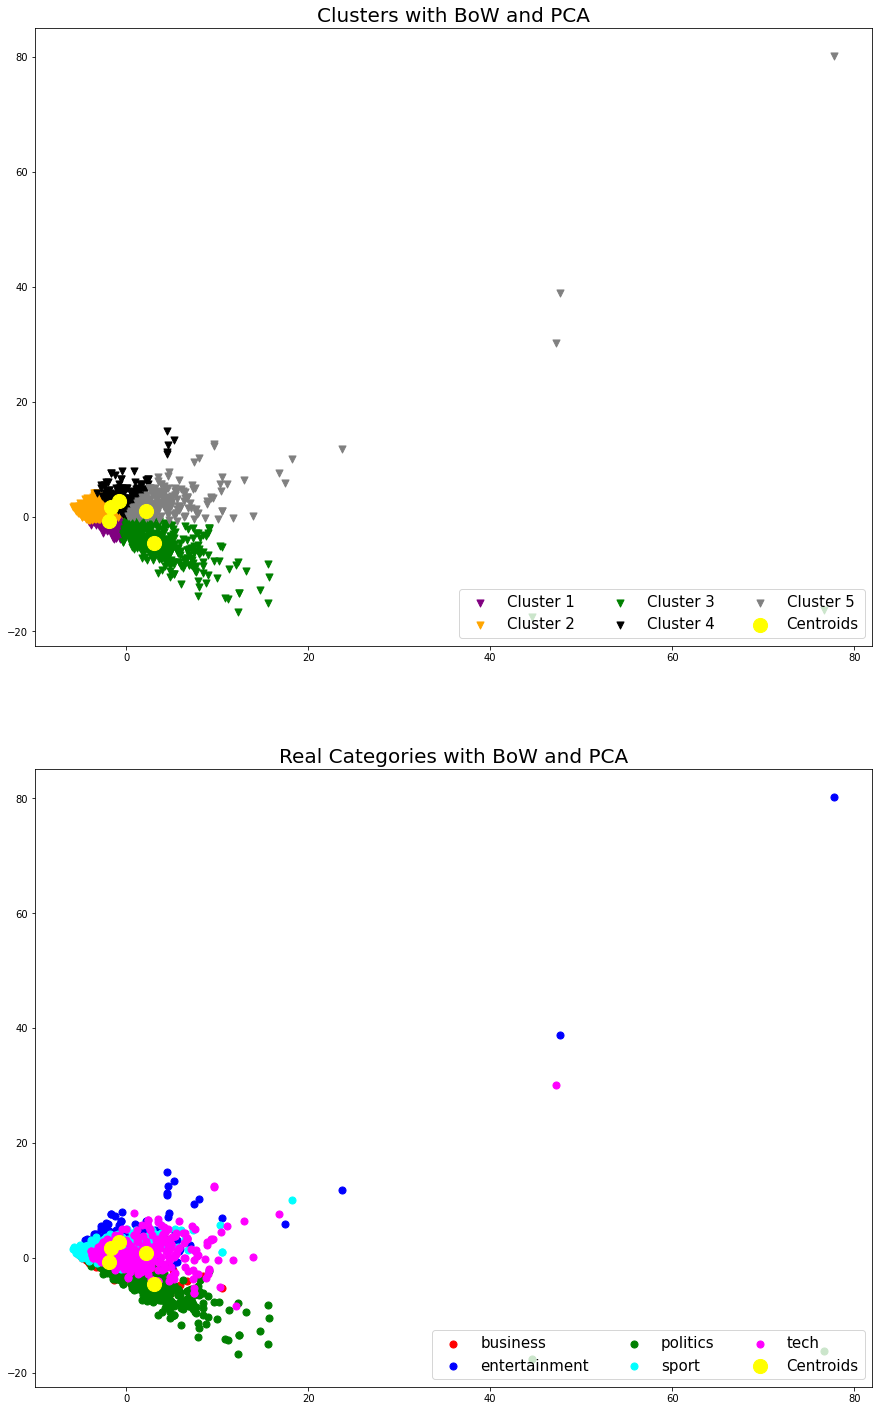

In [0]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,25))
ax[0].set_title('Clusters with BoW and PCA',fontsize=20)
ax[1].set_title('Real Categories with BoW and PCA',fontsize=20)

X0 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 0] 
X1 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 1] 
X2 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 2] 
X3 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 3] 
X4 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 4] 
X = pca_bowX
ax[0].scatter(X[X0, 0], X[X0, 1], s=50, marker="v",c='purple', label ='Cluster 1')
ax[0].scatter(X[X1, 0], X[X1, 1], s=50, marker="v",c='orange', label ='Cluster 2')
ax[0].scatter(X[X2, 0], X[X2, 1], s=50, marker="v",c='green', label ='Cluster 3')
ax[0].scatter(X[X3, 0], X[X3, 1], s=50, marker="v",c='black', label ='Cluster 4')
ax[0].scatter(X[X4, 0], X[X4, 1], s=50, marker="v",c='grey', label ='Cluster 5')

i=0
for category in categories:
    temp_df = pca_bowX_df.loc[pca_bowX_df['category'] == category]
    x = temp_df['x'].tolist()
    y = temp_df['y'].tolist()
    ax[1].scatter(x,y,s=50,c = colors[i],label=category)
    i = i + 1    
        
ax[0].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[1].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[0].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
ax[1].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
plt.show()

No information can be exported...

### Τf-Idf with PCA

In [0]:
from nltk.cluster.kmeans import KMeansClusterer

kmeans = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
y_kmeans = kmeans.cluster(pca_tfidfX, assign_clusters=True)

centers = []
for category in categories:
  temp = pca_tfidfX_df[pca_tfidfX_df['category']==category]
  centers.append([np.mean(temp['x']),np.mean(temp['y'])])
x_centers = [i[0] for i in centers]
y_centers = [i[1] for i in centers]

colors = ['red','blue','green','cyan','magenta']
categories = ['business','entertainment','politics','sport','tech']

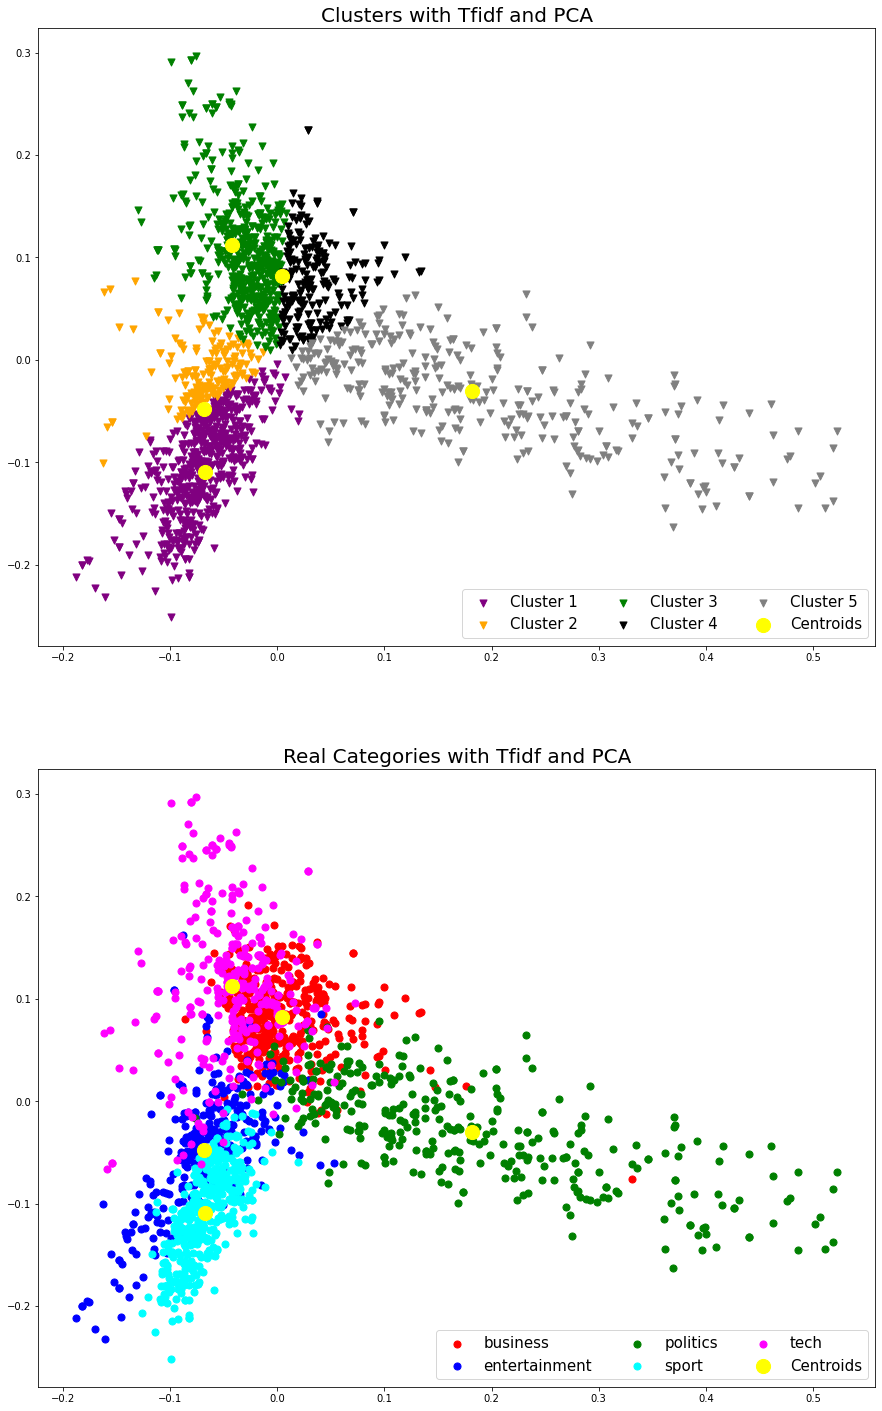

In [0]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,25))
ax[0].set_title('Clusters with Tfidf and PCA',fontsize=20)
ax[1].set_title('Real Categories with Tfidf and PCA',fontsize=20)

X0 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 0] 
X1 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 1] 
X2 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 2] 
X3 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 3] 
X4 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 4] 
X = pca_tfidfX
ax[0].scatter(X[X0, 0], X[X0, 1], s=50, marker="v",c='purple', label ='Cluster 1')
ax[0].scatter(X[X1, 0], X[X1, 1], s=50, marker="v",c='orange', label ='Cluster 2')
ax[0].scatter(X[X2, 0], X[X2, 1], s=50, marker="v",c='green', label ='Cluster 3')
ax[0].scatter(X[X3, 0], X[X3, 1], s=50, marker="v",c='black', label ='Cluster 4')
ax[0].scatter(X[X4, 0], X[X4, 1], s=50, marker="v",c='grey', label ='Cluster 5')

i=0
for category in categories:
    temp_df = pca_tfidfX_df.loc[pca_tfidfX_df['category'] == category]
    x = temp_df['x'].tolist()
    y = temp_df['y'].tolist()
    ax[1].scatter(x,y,s=50,c = colors[i],label=category)
    i = i + 1    
        
ax[0].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[1].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[0].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
ax[1].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
plt.show()

### Tf-Idf with SVD 

In [0]:
from nltk.cluster.kmeans import KMeansClusterer

kmeans = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
y_kmeans = kmeans.cluster(svd_tfidfX, assign_clusters=True)

centers = []
for category in categories:
  temp = svd_tfidfX_df[svd_tfidfX_df['category']==category]
  centers.append([np.mean(temp['x']),np.mean(temp['y'])])
x_centers = [i[0] for i in centers]
y_centers = [i[1] for i in centers]

colors = ['red','blue','green','cyan','magenta']

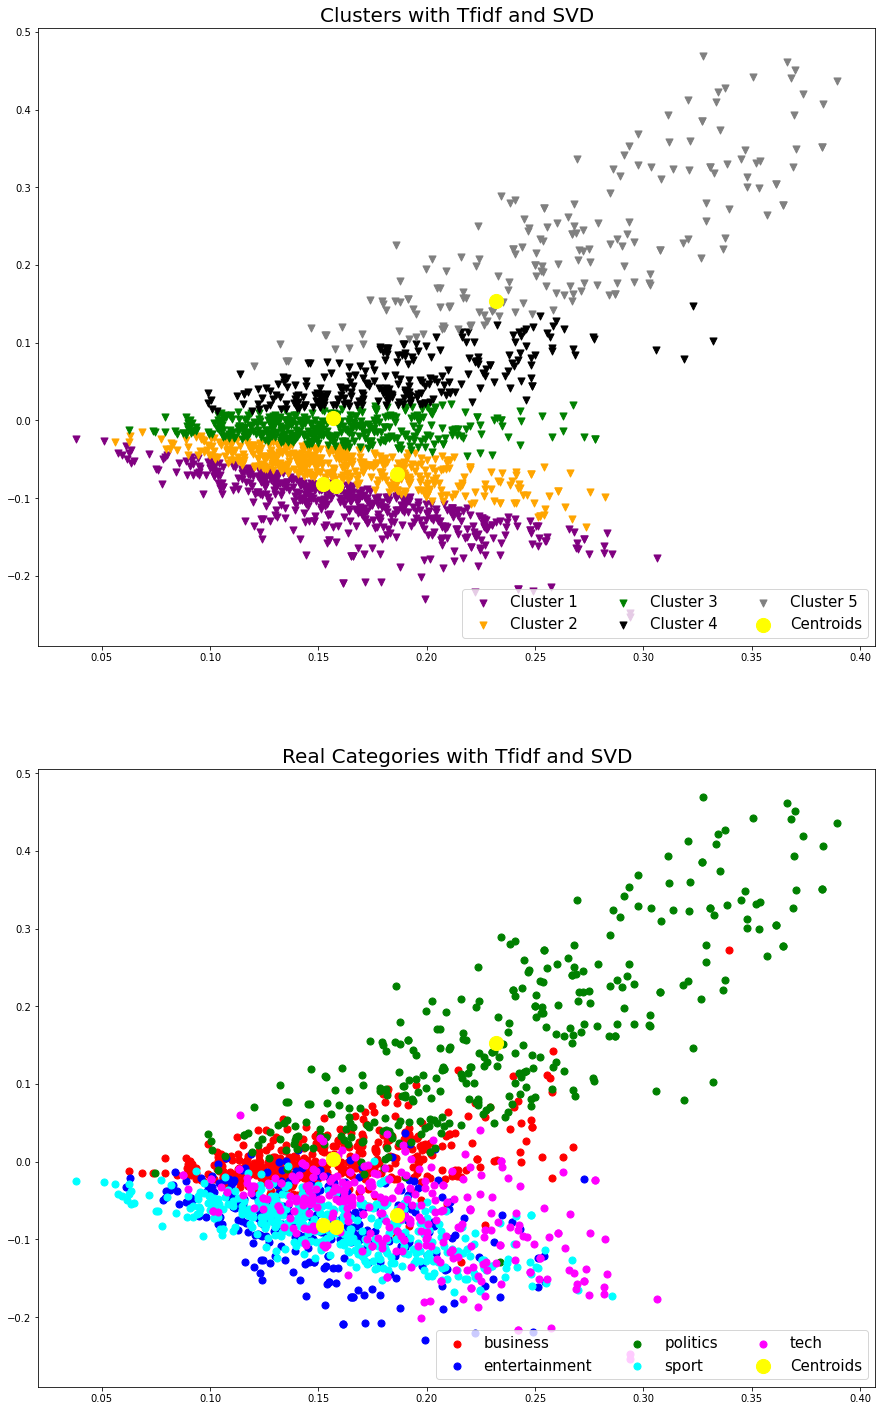

In [0]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,25))
ax[0].set_title('Clusters with Tfidf and SVD',fontsize=20)
ax[1].set_title('Real Categories with Tfidf and SVD',fontsize=20)

X0 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 0] 
X1 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 1] 
X2 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 2] 
X3 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 3] 
X4 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 4] 
X = svd_tfidfX
ax[0].scatter(X[X0, 0], X[X0, 1], s=50, marker="v",c='purple', label ='Cluster 1')
ax[0].scatter(X[X1, 0], X[X1, 1], s=50, marker="v",c='orange', label ='Cluster 2')
ax[0].scatter(X[X2, 0], X[X2, 1], s=50, marker="v",c='green', label ='Cluster 3')
ax[0].scatter(X[X3, 0], X[X3, 1], s=50, marker="v",c='black', label ='Cluster 4')
ax[0].scatter(X[X4, 0], X[X4, 1], s=50, marker="v",c='grey', label ='Cluster 5')

i=0
for category in categories:
    temp_df = svd_tfidfX_df.loc[svd_tfidfX_df['category'] == category]
    x = temp_df['x'].tolist()
    y = temp_df['y'].tolist()
    ax[1].scatter(x,y,s=50,c = colors[i],label=category)
    i = i + 1    
        
ax[0].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[1].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[0].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
ax[1].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
plt.show()

### Tf-Idf with ICA

In [0]:
from nltk.cluster.kmeans import KMeansClusterer

kmeans = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
y_kmeans = kmeans.cluster(ica_tfidfX, assign_clusters=True)

centers = []
for category in categories:
  temp = ica_tfidfX_df[ica_tfidfX_df['category']==category]
  centers.append([np.mean(temp['x']),np.mean(temp['y'])])
x_centers = [i[0] for i in centers]
y_centers = [i[1] for i in centers]

colors = ['red','blue','green','cyan','magenta']
categories = ['business','entertainment','politics','sport','tech']

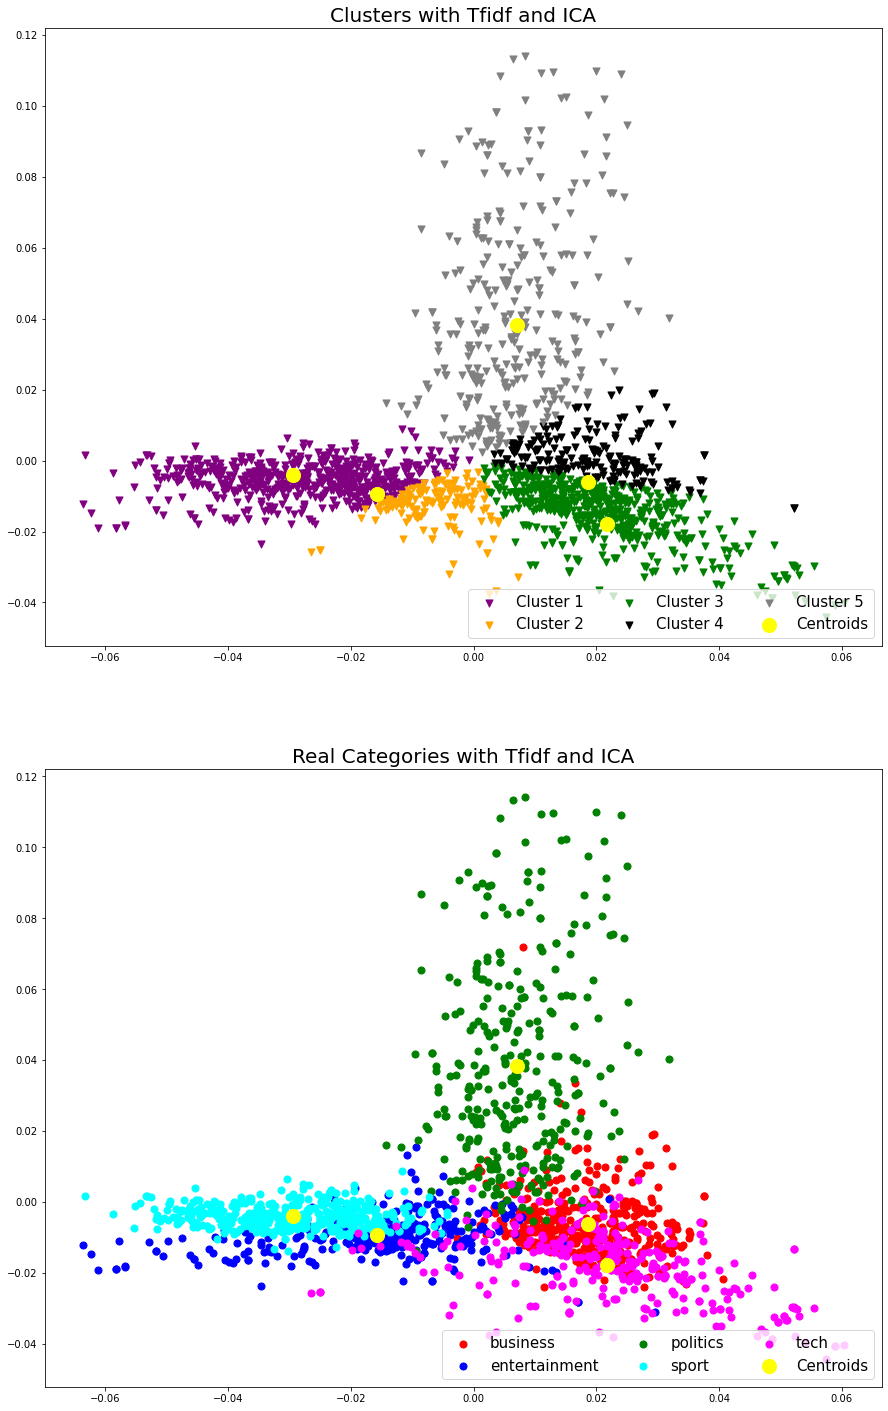

In [0]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,25))
ax[0].set_title('Clusters with Tfidf and ICA',fontsize=20)
ax[1].set_title('Real Categories with Tfidf and ICA',fontsize=20)

X0 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 0] 
X1 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 1] 
X2 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 2] 
X3 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 3] 
X4 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 4] 
X = ica_tfidfX
ax[0].scatter(X[X0, 0], X[X0, 1], s=50, marker="v",c='purple', label ='Cluster 1')
ax[0].scatter(X[X1, 0], X[X1, 1], s=50, marker="v",c='orange', label ='Cluster 2')
ax[0].scatter(X[X2, 0], X[X2, 1], s=50, marker="v",c='green', label ='Cluster 3')
ax[0].scatter(X[X3, 0], X[X3, 1], s=50, marker="v",c='black', label ='Cluster 4')
ax[0].scatter(X[X4, 0], X[X4, 1], s=50, marker="v",c='grey', label ='Cluster 5')

i=0
for category in categories:
    temp_df = ica_tfidfX_df.loc[ica_tfidfX_df['category'] == category]
    x = temp_df['x'].tolist()
    y = temp_df['y'].tolist()
    ax[1].scatter(x,y,s=50,c = colors[i],label=category)
    i = i + 1    
        
ax[0].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[1].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[0].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
ax[1].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
plt.show()

### Word2Vec with PCA

In [0]:
from nltk.cluster.kmeans import KMeansClusterer

kmeans = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
y_kmeans = kmeans.cluster(pca_w2vX, assign_clusters=True)

centers = []
for category in categories:
  temp = pca_w2vX_df[pca_w2vX_df['category']==category]
  centers.append([np.mean(temp['x']),np.mean(temp['y'])])
x_centers = [i[0] for i in centers]
y_centers = [i[1] for i in centers]

colors = ['red','blue','green','cyan','magenta']
categories = ['business','entertainment','politics','sport','tech']

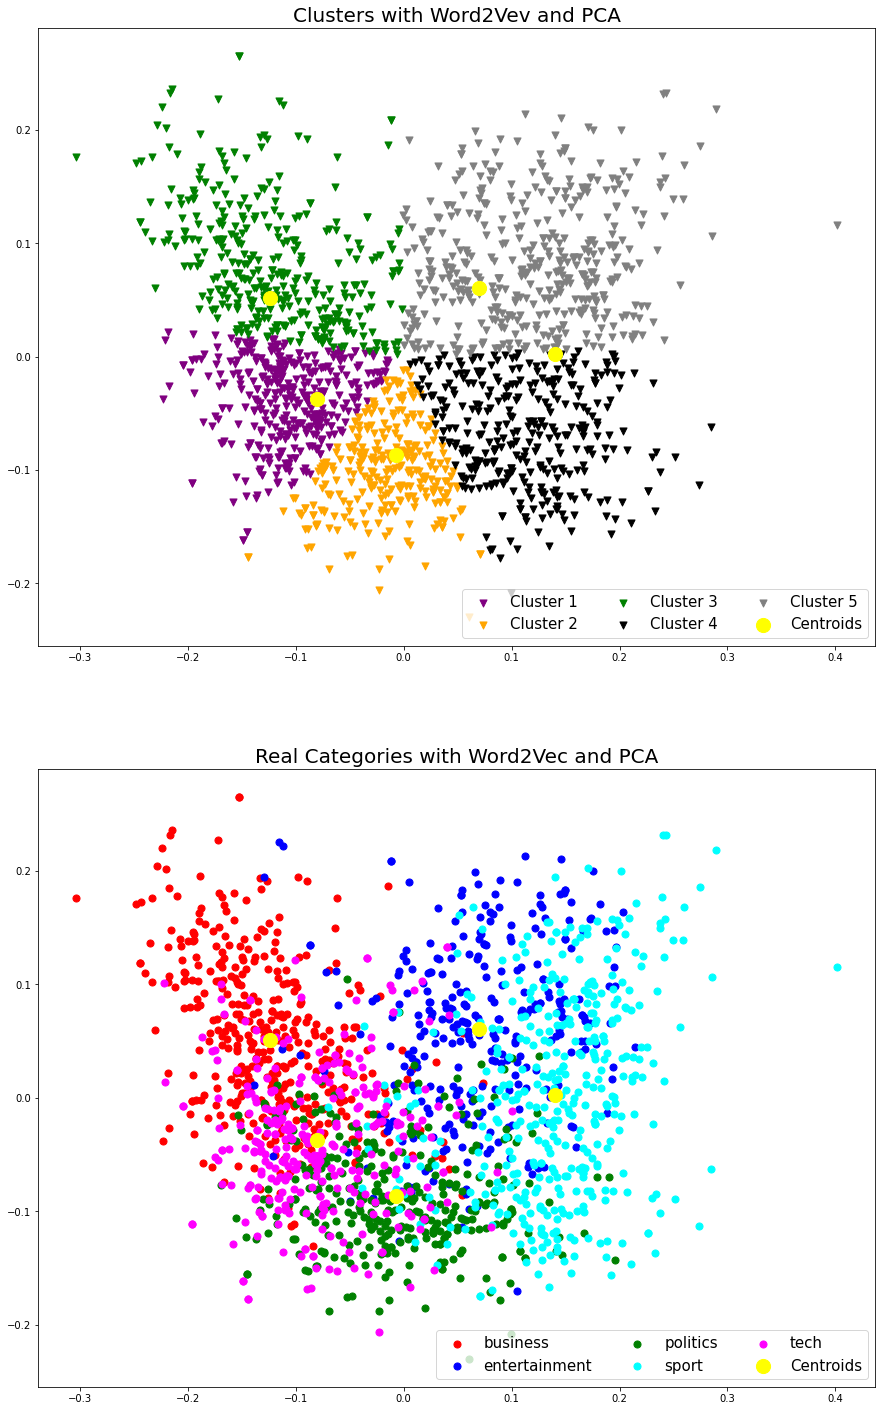

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,25))
ax[0].set_title('Clusters with Word2Vev and PCA',fontsize=20)
ax[1].set_title('Real Categories with Word2Vec and PCA',fontsize=20)

X0 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 0] 
X1 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 1] 
X2 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 2] 
X3 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 3] 
X4 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 4] 
X = pca_w2vX
ax[0].scatter(X[X0, 0], X[X0, 1], s=50, marker="v",c='purple', label ='Cluster 1')
ax[0].scatter(X[X1, 0], X[X1, 1], s=50, marker="v",c='orange', label ='Cluster 2')
ax[0].scatter(X[X2, 0], X[X2, 1], s=50, marker="v",c='green', label ='Cluster 3')
ax[0].scatter(X[X3, 0], X[X3, 1], s=50, marker="v",c='black', label ='Cluster 4')
ax[0].scatter(X[X4, 0], X[X4, 1], s=50, marker="v",c='grey', label ='Cluster 5')

i=0
for category in categories:
    temp_df = pca_w2vX_df.loc[pca_w2vX_df['category'] == category]
    x = temp_df['x'].tolist()
    y = temp_df['y'].tolist()
    ax[1].scatter(x,y,s=50,c = colors[i],label=category)
    i = i + 1    
        
ax[0].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[1].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[0].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
ax[1].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
plt.show()

### Word2Vec with SVD

In [0]:
from nltk.cluster.kmeans import KMeansClusterer

kmeans = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
y_kmeans = kmeans.cluster(svd_w2vX, assign_clusters=True)

centers = []
for category in categories:
  temp = svd_w2vX_df[svd_w2vX_df['category']==category]
  centers.append([np.mean(temp['x']),np.mean(temp['y'])])
x_centers = [i[0] for i in centers]
y_centers = [i[1] for i in centers]

colors = ['red','blue','green','cyan','magenta']
categories = ['business','entertainment','politics','sport','tech']

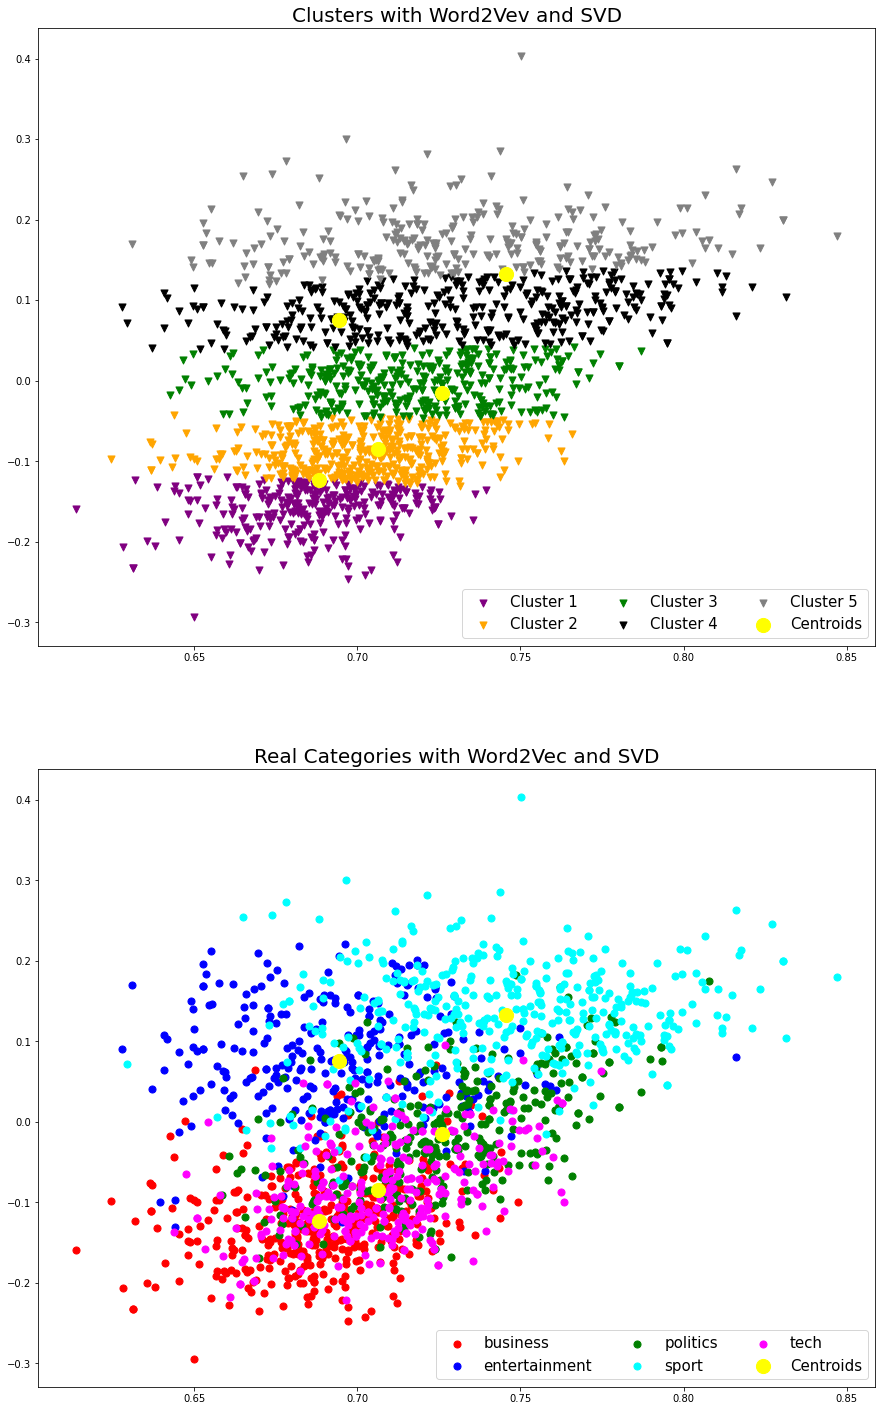

In [0]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,25))
ax[0].set_title('Clusters with Word2Vev and SVD',fontsize=20)
ax[1].set_title('Real Categories with Word2Vec and SVD',fontsize=20)

X0 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 0] 
X1 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 1] 
X2 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 2] 
X3 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 3] 
X4 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 4] 
X = svd_w2vX
ax[0].scatter(X[X0, 0], X[X0, 1], s=50, marker="v",c='purple', label ='Cluster 1')
ax[0].scatter(X[X1, 0], X[X1, 1], s=50, marker="v",c='orange', label ='Cluster 2')
ax[0].scatter(X[X2, 0], X[X2, 1], s=50, marker="v",c='green', label ='Cluster 3')
ax[0].scatter(X[X3, 0], X[X3, 1], s=50, marker="v",c='black', label ='Cluster 4')
ax[0].scatter(X[X4, 0], X[X4, 1], s=50, marker="v",c='grey', label ='Cluster 5')

i=0
for category in categories:
    temp_df = svd_w2vX_df.loc[svd_w2vX_df['category'] == category]
    x = temp_df['x'].tolist()
    y = temp_df['y'].tolist()
    ax[1].scatter(x,y,s=50,c = colors[i],label=category)
    i = i + 1    
        
ax[0].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[1].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[0].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
ax[1].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
plt.show()

### Word2Vec with ICA 

In [0]:
from nltk.cluster.kmeans import KMeansClusterer

kmeans = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
y_kmeans = kmeans.cluster(ica_w2vX, assign_clusters=True)

centers = []
for category in categories:
  temp = ica_w2vX_df[ica_w2vX_df['category']==category]
  centers.append([np.mean(temp['x']),np.mean(temp['y'])])
x_centers = [i[0] for i in centers]
y_centers = [i[1] for i in centers]

colors = ['red','blue','green','cyan','magenta']
categories = ['business','entertainment','politics','sport','tech']

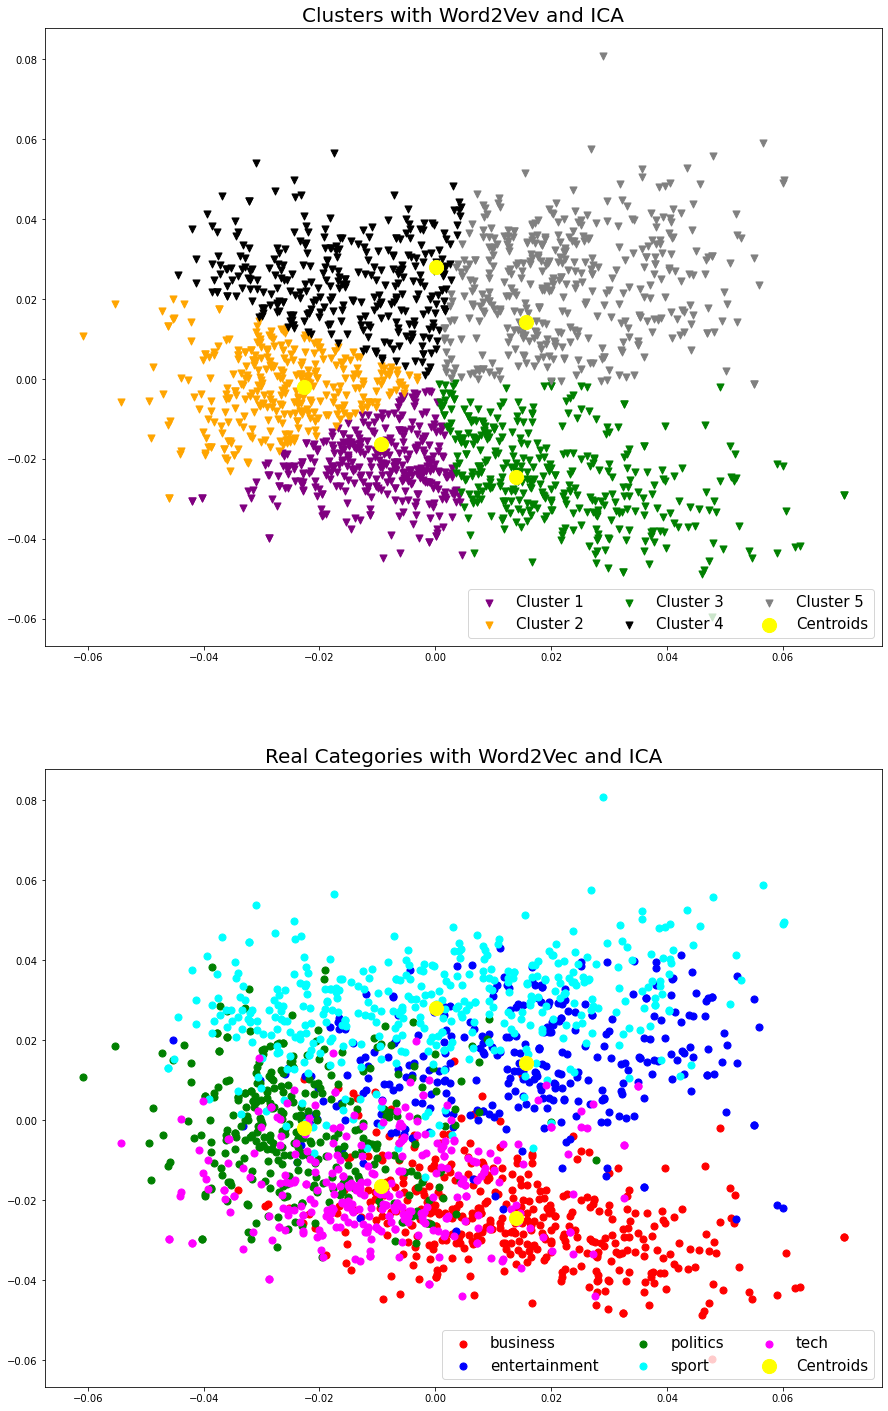

In [0]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,25))
ax[0].set_title('Clusters with Word2Vev and ICA',fontsize=20)
ax[1].set_title('Real Categories with Word2Vec and ICA',fontsize=20)

X0 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 0] 
X1 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 1] 
X2 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 2] 
X3 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 3] 
X4 = [i for i in range(len(y_kmeans)) if y_kmeans[i] == 4] 
X = ica_w2vX
ax[0].scatter(X[X0, 0], X[X0, 1], s=50, marker="v",c='purple', label ='Cluster 1')
ax[0].scatter(X[X1, 0], X[X1, 1], s=50, marker="v",c='orange', label ='Cluster 2')
ax[0].scatter(X[X2, 0], X[X2, 1], s=50, marker="v",c='green', label ='Cluster 3')
ax[0].scatter(X[X3, 0], X[X3, 1], s=50, marker="v",c='black', label ='Cluster 4')
ax[0].scatter(X[X4, 0], X[X4, 1], s=50, marker="v",c='grey', label ='Cluster 5')

i=0
for category in categories:
    temp_df = ica_w2vX_df.loc[ica_w2vX_df['category'] == category]
    x = temp_df['x'].tolist()
    y = temp_df['y'].tolist()
    ax[1].scatter(x,y,s=50,c = colors[i],label=category)
    i = i + 1    
        
ax[0].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[1].scatter(x_centers, y_centers, s=200, c='yellow', label = 'Centroids')
ax[0].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
ax[1].legend(
           loc='lower right',
           ncol=3,
           fontsize=15)
plt.show()

## e. Conclusions
Observations:
- Compared with all displays, K-means Clusterer **reached** real categories **more** with **Tf-Idf with ICA** and **Tf-Idf with PCA**.
- Compared with Word2Vec's displays, K-means Clusterer **reached** real categories **less** with **Word2Vec with PCA** και **Word2Vec with SVD**, but we have to mention that tried descently with **Word2Vec with ΙCA**.